### Pandas Visualization Part 01

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
flowers = pd.DataFrame({
    'species':np.random.choice(a=['Alyssum','Amaranthus','Aster','Rose', 'Lily', 'Jonquil'], size=1000),
    'shades':np.random.choice(a=['red','blue'], size=1000),
    'prod_summer': 260+np.random.normal(350, 100, 1000),
    'prod_winter': 150+np.random.normal(100, 30, 1000),
    'prod_fall': 355+np.random.normal(300, 130, 1000),
    'prod_spring': 440+np.random.normal(450, 70, 1000),
    'num_orders': np.random.randn(1000)*2

    }
    ,index=pd.date_range('2017-01-01', periods=1000)
)
flowers.head(3)

,species,shades,prod_summer,prod_winter,prod_fall,prod_spring,num_orders
2017-01-01,Lily,blue,515.360003,253.201994,868.562873,809.200573,-1.607459
2017-01-02,Aster,red,592.089718,170.039846,703.719068,838.270703,-0.929441
2017-01-03,Alyssum,red,596.902212,280.856645,733.806337,772.915952,-0.611125


### Line Plot

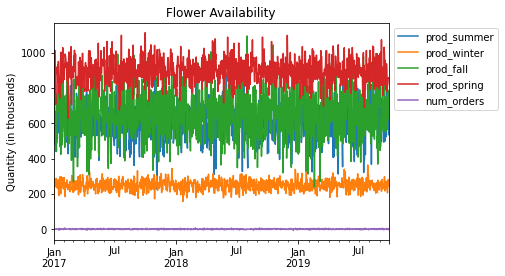

In [4]:
flowers.plot();
plt.ylabel('Quantity (in thousands)')
plt.title('Flower Availability')
plt.legend(bbox_to_anchor=(1,1))

### Bar 

<AxesSubplot:>

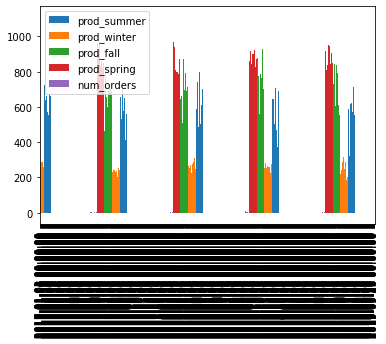

In [5]:
flowers.plot(kind='bar')

<AxesSubplot:>

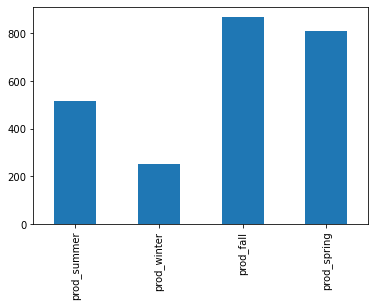

In [6]:
flowers.iloc[0,2:6].plot(kind = 'bar')

<AxesSubplot:>

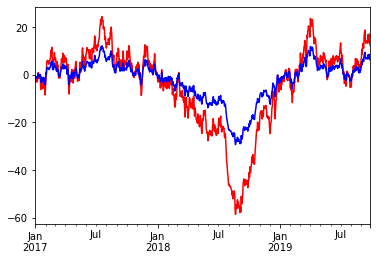

In [7]:
flowers['num_orders'].cumsum().plot(color='red')
(flowers['num_orders']/2).cumsum().plot(color='blue')

In [8]:
### Drop column 'num_order'

flowers = flowers.drop('num_orders', axis=1)
flowers.head(2)

,species,shades,prod_summer,prod_winter,prod_fall,prod_spring
2017-01-01,Lily,blue,515.360003,253.201994,868.562873,809.200573
2017-01-02,Aster,red,592.089718,170.039846,703.719068,838.270703


<AxesSubplot:ylabel='Frequency'>

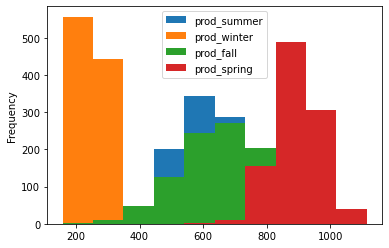

In [9]:
flowers.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

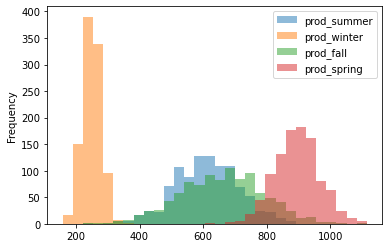

In [10]:
flowers.plot(kind='hist', alpha=.5, bins = 30)

array([[<AxesSubplot:title={'center':'prod_summer'}>,
        <AxesSubplot:title={'center':'prod_winter'}>],
       [<AxesSubplot:title={'center':'prod_fall'}>,
        <AxesSubplot:title={'center':'prod_spring'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

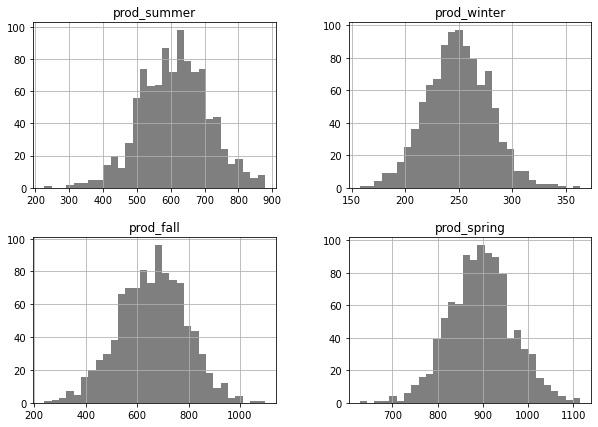

In [11]:
plt.figure()
flowers.hist(color='k', alpha=0.5, bins = 30, figsize = (10,7))

<AxesSubplot:>

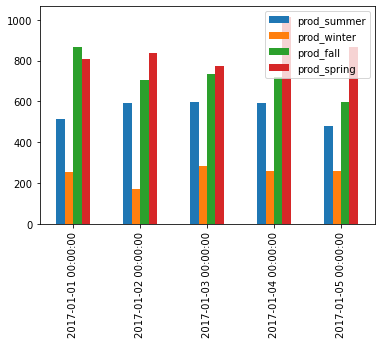

In [12]:
flowers.iloc[:5,:].plot.bar()

<AxesSubplot:>

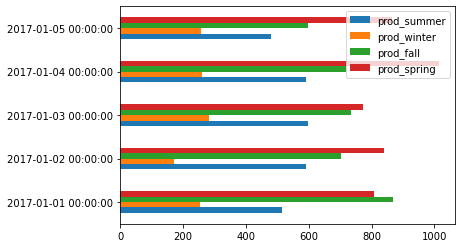

In [13]:
flowers.iloc[:5,:].plot.barh()

<AxesSubplot:>

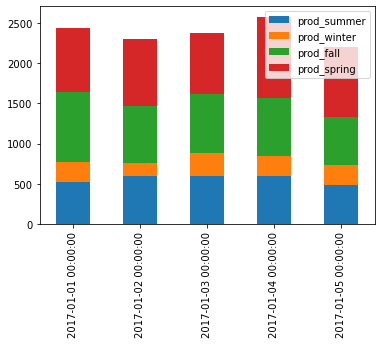

In [14]:
flowers.iloc[:5,:].plot.bar(stacked=True)

<AxesSubplot:>

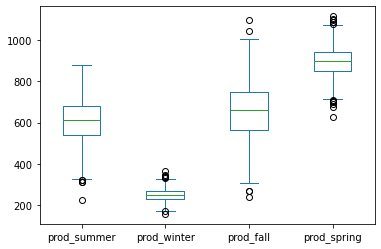

In [15]:
flowers.plot.box()

<AxesSubplot:>

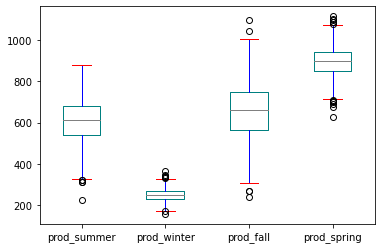

In [16]:
color = {'boxes':'teal', 'whiskers':'blue', 'medians':'gray', 'caps':'red'}
flowers.plot.box(color = color, sym = 'o')

<AxesSubplot:>

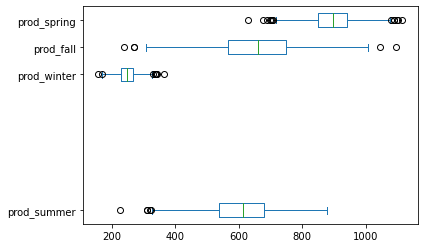

In [17]:
flowers.plot.box(vert = False, positions = [1,6,7,8])

<AxesSubplot:>

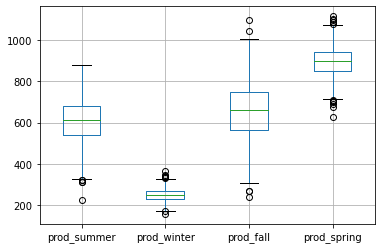

In [18]:
flowers.boxplot()

In [20]:
flowers.head(2)

,species,shades,prod_summer,prod_winter,prod_fall,prod_spring
2017-01-01,Lily,blue,515.360003,253.201994,868.562873,809.200573
2017-01-02,Aster,red,592.089718,170.039846,703.719068,838.270703


array([[<AxesSubplot:title={'center':'prod_fall'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'prod_spring'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'prod_summer'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'prod_winter'}, xlabel='[species]'>]],
      dtype=object)

<Figure size 432x288 with 0 Axes>

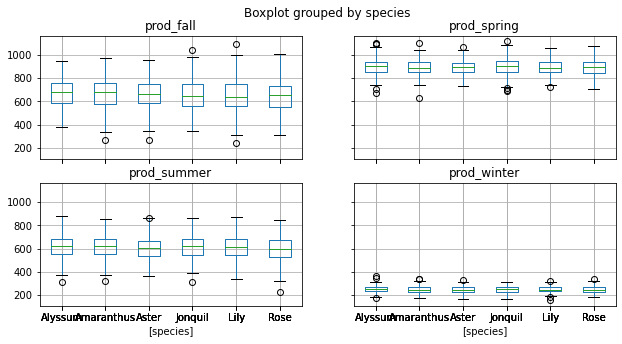

In [21]:
plt.figure()
flowers.boxplot(by='species', figsize=(10,5))

In [22]:
flowers.shades.unique()

array(['blue', 'red'], dtype=object)

array([<AxesSubplot:title={'center':'prod_summer'}, xlabel='[shades, species]'>,
       <AxesSubplot:title={'center':'prod_winter'}, xlabel='[shades, species]'>],
      dtype=object)

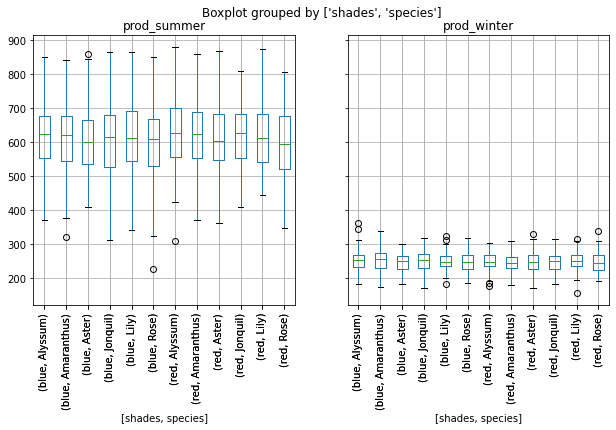

In [25]:
flowers.boxplot(column=['prod_summer','prod_winter'], by = ['shades','species'], figsize=(10,5), rot = 90)

<AxesSubplot:title={'center':'prod_spring'}, xlabel='[species]'>

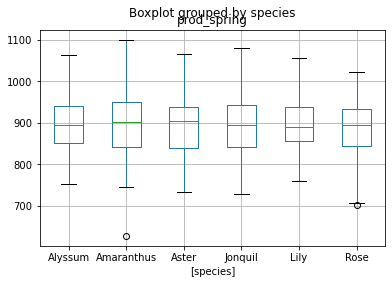

In [26]:
flowers[flowers['shades']=='red'][['prod_spring','species']].boxplot(by='species')

<AxesSubplot:>

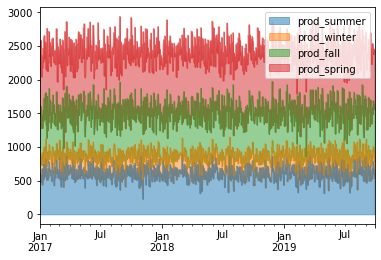

In [28]:
flowers.plot.area(alpha=.5)

<AxesSubplot:>

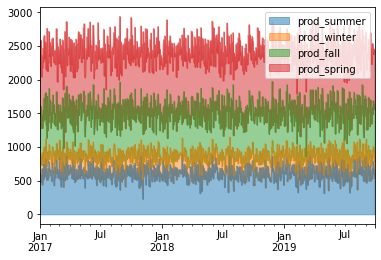

In [29]:
flowers.plot.area(stacked=True, alpha = 0.5)

In [30]:
#New Columns

flowers['day'] = flowers.index.day
flowers['revenue_million'] = np.random.randint(0,100, size= 1000)
flowers.head(2)

,species,shades,prod_summer,prod_winter,prod_fall,prod_spring,day,revenue_million
2017-01-01,Lily,blue,515.360003,253.201994,868.562873,809.200573,1,23
2017-01-02,Aster,red,592.089718,170.039846,703.719068,838.270703,2,60


<AxesSubplot:xlabel='prod_summer', ylabel='revenue_million'>

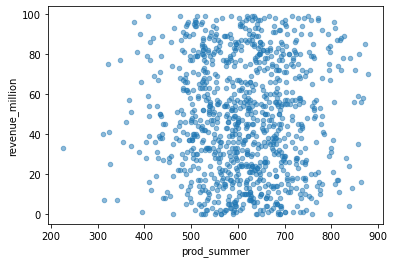

In [32]:
flowers.plot.scatter('prod_summer','revenue_million', alpha = .5)

<AxesSubplot:xlabel='prod_summer', ylabel='revenue_million'>

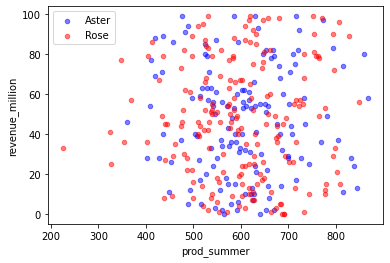

In [35]:
ax = flowers[flowers['species']=='Aster'].plot.scatter('prod_summer','revenue_million', alpha = .5, color = 'blue', label = 'Aster')
flowers[flowers['species']=='Rose'].plot.scatter('prod_summer','revenue_million', alpha = .5, ax=ax, color = 'red', label = 'Rose')

<AxesSubplot:xlabel='revenue_million', ylabel='prod_winter'>

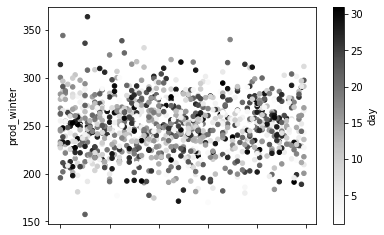

In [37]:
flowers.plot.scatter('revenue_million', 'prod_winter', c= 'day')

<AxesSubplot:xlabel='day', ylabel='prod_winter'>

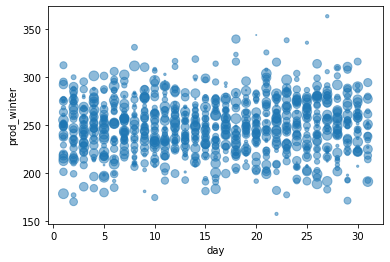

In [40]:
flowers.plot.scatter(x='day', y = 'prod_winter', s=flowers['revenue_million'], alpha=0.5)

<AxesSubplot:xlabel='prod_summer', ylabel='revenue_million'>

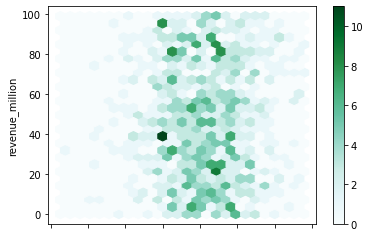

In [42]:
flowers.plot.hexbin(x='prod_summer', y ='revenue_million', gridsize=25)

<AxesSubplot:xlabel='prod_summer', ylabel='revenue_million'>

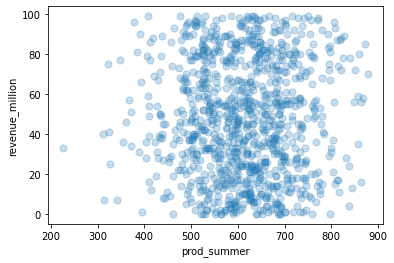

In [44]:
flowers.plot.scatter(x='prod_summer', y ='revenue_million', alpha=.25, s=50)

In [47]:
grp_flowers = flowers.groupby(['species']).sum().reset_index()
grp_flowers.head()

,species,prod_summer,prod_winter,prod_fall,prod_spring,day,revenue_million
0,Alyssum,112374.128118,45390.516745,120647.349849,162779.617055,2750,8576
1,Amaranthus,105194.445409,42917.593161,114023.413914,152978.958973,2803,8171
2,Aster,86821.039026,35476.698508,94762.078790,127473.833710,2179,6622
3,Jonquil,94660.103367,38470.367269,101372.816441,139498.954460,2474,7260
4,Lily,97284.264590,39467.866712,102031.197314,141587.904127,2342,7612


In [48]:
grp_flowers = grp_flowers.set_index('species')
grp_flowers

,prod_summer,prod_winter,prod_fall,prod_spring,day,revenue_million
species,,,,,,
Alyssum,112374.128118,45390.516745,120647.349849,162779.617055,2750,8576
Amaranthus,105194.445409,42917.593161,114023.413914,152978.958973,2803,8171
Aster,86821.039026,35476.698508,94762.078790,127473.833710,2179,6622
Jonquil,94660.103367,38470.367269,101372.816441,139498.954460,2474,7260
Lily,97284.264590,39467.866712,102031.197314,141587.904127,2342,7612
Rose,114891.566542,47610.487143,125891.994554,171667.258089,3122,8987


array([<AxesSubplot:ylabel='prod_summer'>,
       <AxesSubplot:ylabel='prod_winter'>], dtype=object)

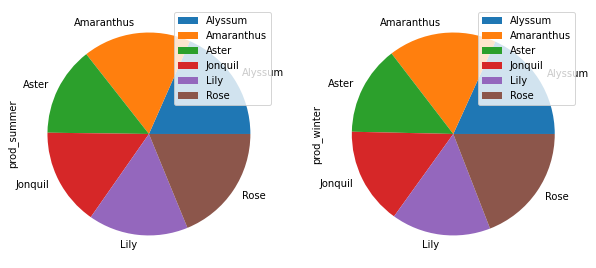

In [49]:
grp_flowers[['prod_summer','prod_winter']].plot.pie(subplots = True, figsize=(10,5))